This notebook contains visualizations of the data augmentations used for the MIT ADSP capstone project on facial emotion detection.

Google Colab setup

In [23]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Set main directory
main_directory = '/content/drive/MyDrive/facial-emotion-detection-cnn'

Mounted at /content/drive


Get some helpful tools

In [24]:
# Import the libraries
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Access 'common_functions.py' file

In [ ]:
# Specify path to common functions python file
project_path = Path(os.path.join(main_directory, 'notebooks'))
common_functions_file = 'common_functions.py'

# Construct the full path of common functions python file
full_path = project_path / common_functions_file

# Use exec to run the file
exec(open(full_path).read())

Specify location of preprocessed dataset

In [25]:
# Specify path to preprocessed dataset
preprocessed_data_directory = os.path.join(main_directory, 'data/unique_images')

Visualize the data augmentations

Loading image: /content/drive/MyDrive/facial-emotion-detection-cnn/data/unique_images/train/happy/32429.jpg
Loading image: /content/drive/MyDrive/facial-emotion-detection-cnn/data/unique_images/train/sad/25187.jpg
Loading image: /content/drive/MyDrive/facial-emotion-detection-cnn/data/unique_images/train/neutral/14089.jpg
Loading image: /content/drive/MyDrive/facial-emotion-detection-cnn/data/unique_images/train/surprise/32943.jpg


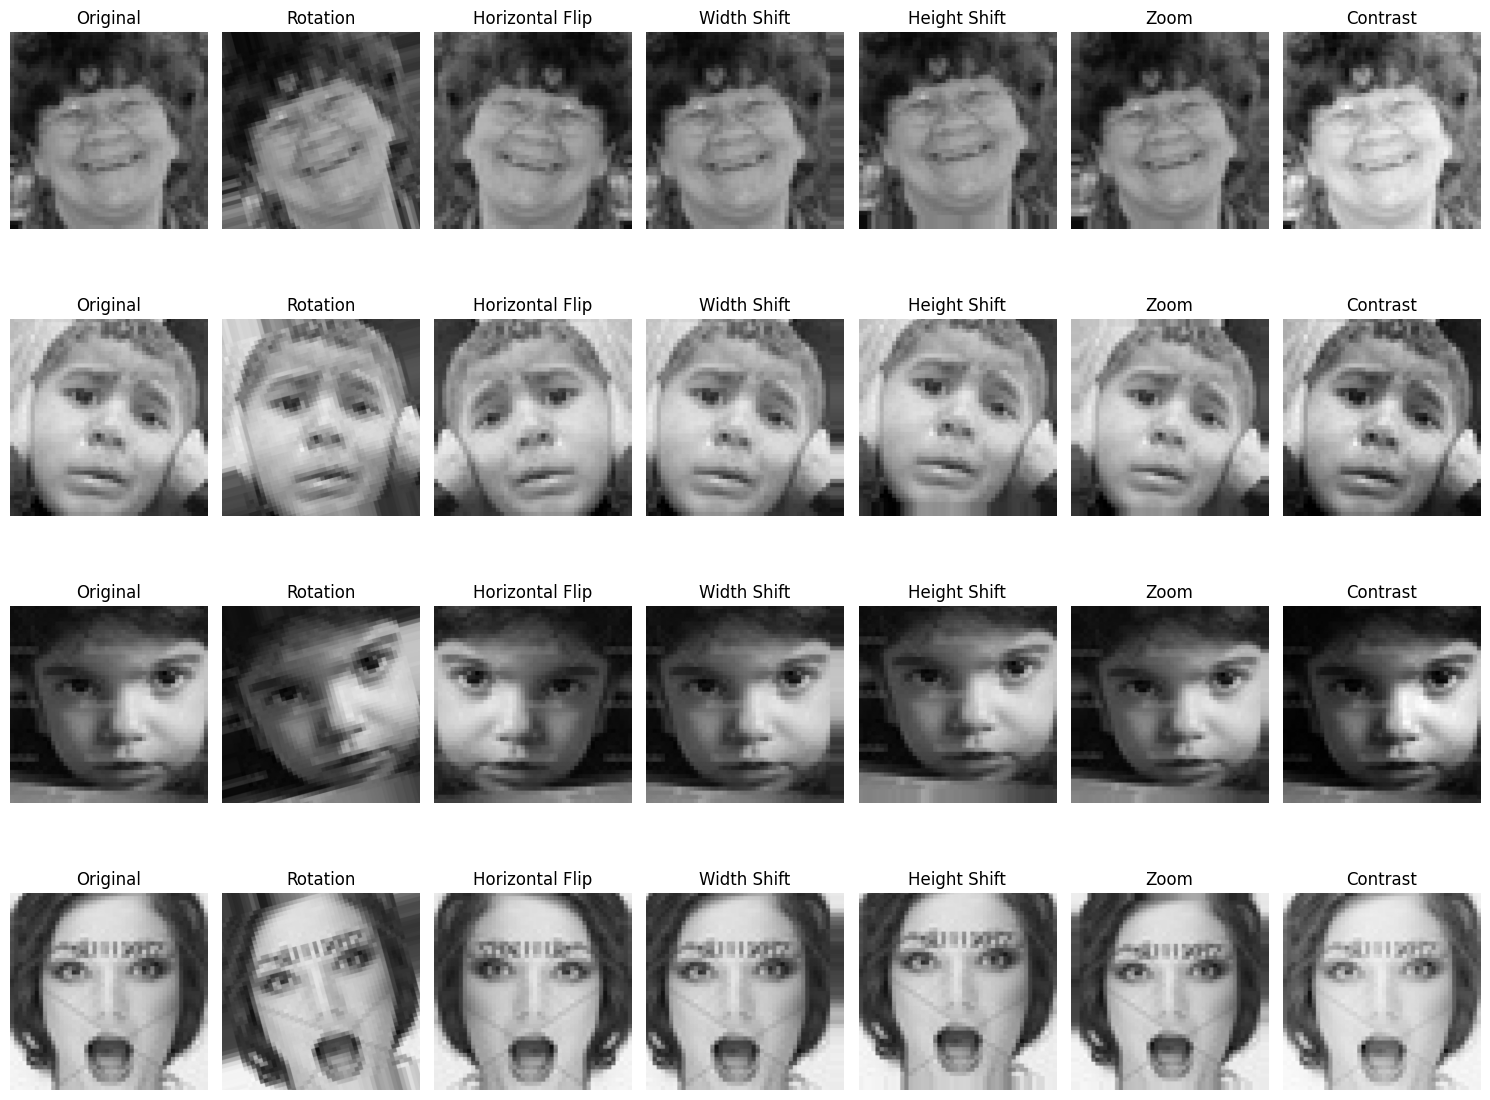

In [29]:
# Define the list of emotion classes
emotion_classes = ['happy', 'sad', 'neutral', 'surprise']

# Define the maximum range for each augmentation parameter
max_rotation_range = 15   # Maximum rotation angle (degrees)
max_shift_range = 0.05     # Maximum shift range (fraction of total width/height)
max_zoom_range = 0.05      # Maximum zoom range

# Initialize ImageDataGenerator with desired augmentation parameters
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=max_rotation_range,
                                   width_shift_range=max_shift_range,
                                   height_shift_range=max_shift_range,
                                   zoom_range=max_zoom_range,
                                   preprocessing_function=adjust_contrast_and_gamma,
                                   horizontal_flip=True)

# Target size for resizing
target_size = (224, 224)

# Initialize subplot grid
num_rows = len(emotion_classes)
num_cols = 7  # One column for each augmentation parameter

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Iterate over each emotion class
for i, emotion in enumerate(emotion_classes):
    # Get a random image from the emotion class directory
    image_path = os.path.join(preprocessed_data_directory, 'train', emotion, np.random.choice(os.listdir(os.path.join(preprocessed_data_directory, 'train', emotion))))
    print(f"Loading image: {image_path}")

    # Load the image
    img = imread(image_path)

    # Display the original image
    axs[i, 0].imshow(img)
    axs[i, 0].set_title('Original')
    axs[i, 0].axis('off')

    # Apply augmentation with the maximum range and display the augmented versions
    augmented_images = [img]  # List to store augmented images

    # Rotation
    augmented_img = train_datagen.apply_transform(img, {'theta': max_rotation_range})
    axs[i, 1].imshow(augmented_img)
    axs[i, 1].set_title('Rotation')
    axs[i, 1].axis('off')

    # Horizontal flip
    augmented_img = train_datagen.apply_transform(img, {'flip_horizontal': True})
    axs[i, 2].imshow(augmented_img)
    axs[i, 2].set_title('Horizontal Flip')
    axs[i, 2].axis('off')

    # Width shift
    augmented_img = train_datagen.apply_transform(img, {'tx': max_shift_range * img.shape[1]})
    axs[i, 3].imshow(augmented_img)
    axs[i, 3].set_title('Width Shift')
    axs[i, 3].axis('off')

    # Height shift
    augmented_img = train_datagen.apply_transform(img, {'ty': max_shift_range * img.shape[0]})
    axs[i, 4].imshow(augmented_img)
    axs[i, 4].set_title('Height Shift')
    axs[i, 4].axis('off')

    # Zoom
    augmented_img = train_datagen.apply_transform(img, {'zx': 1 + max_zoom_range, 'zy': 1 + max_zoom_range})
    axs[i, 5].imshow(augmented_img)
    axs[i, 5].set_title('Zoom')
    axs[i, 5].axis('off')

    # Adjust contrast/gamma
    augmented_img_contrast = adjust_contrast_and_gamma(img)
    axs[i, 6].imshow(augmented_img_contrast)
    axs[i, 6].set_title('Contrast')
    axs[i, 6].axis('off')

plt.tight_layout()
plt.show()